# Data Management : 데이터버전관리 필요성
- 머신러닝의 버전관리를 위해서는 git을 사용하고 있음. 근데 이런 프로그램은 대용량 처리에 적합하지않다는 단점이 있음
- 예를들어 마스크 착용여부를 검출하는 딥러능 모델학습을 위한 영상파일을 공유하고 싶어도 github는 100MB 파일크기 제한이 있어 업로드가 어려움
- 아마존 등에 대용량 파일을 저장해놓고 링크를 따두는게 일반적임
- 불편하므로 소스코드와 데이터를 한번에 관리하려는 tool이 만들어짐
- git * {DVC, Pachyderm, Delta Lake, Dolt}와 같은 tool 들이 있다
- 이 중 오픈소스인 Data Version Control(DVC)를 배우고자 함

## Data Version Control(DVC)
- 대부분 스토리지와 호환(amazon s3, google drive)
- Github외 GitLab, Bitbucket등의 대부분의 git 호스팅 서버와 연동
- Data Pipeline을 DAG로 관리
- Git과 유사한 인터페이스

## DVC 실습 자료

# 1. DVC 설치

- **python** 설치
    - python 3.8 이상의 환경을 준비합니다.
        - (python 설치 방법은 별도로 첨부된 강의자료를 확인하세요.)

- source /mnt/d/ubu/mmlab/bin/activate
```
sudo apt install git

git --version
# git version 2.25.1

git --help
# 정상 설치되었는지 확인

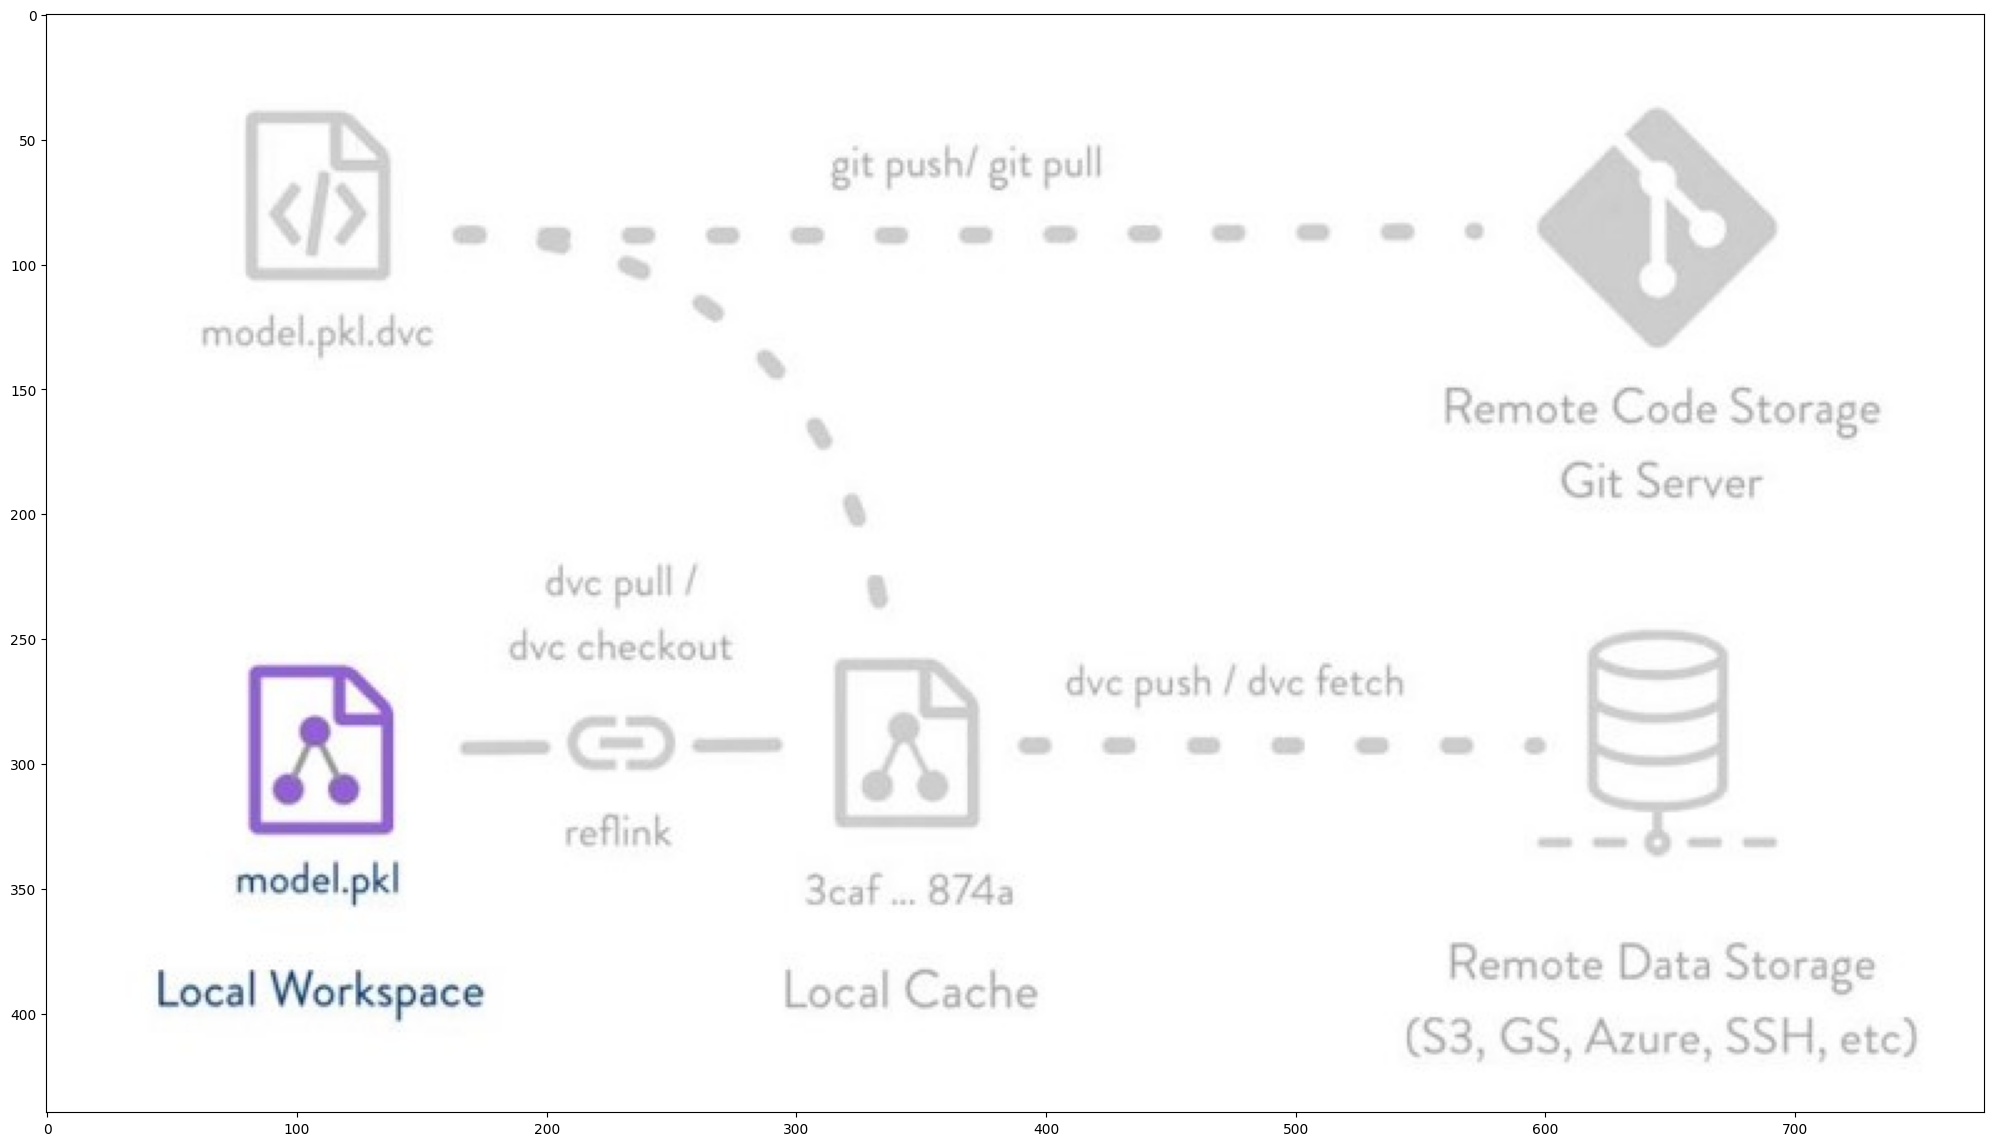

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

def display(start, end):
    for i in range(end+1):
        if i > start-1:
            GAP = cv2.imread(f'yaml{i}.jpg')
            GAP = cv2.cvtColor(GAP, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(25,25))
            plt.imshow(GAP)
            plt.show()

display(start=10, end=10)

- **dvc** 설치
    - dvc 2.6.4 버전을 다운받습니다.
    - `dvc[all]` 에서 `[all]` 은 dvc 의 remote storage 로 s3, gs, azure, oss, ssh 모두를 사용할 수 있도록 관련 패키지를 함께 설치하는 옵션입니다.
```
pip install dvc[all]==3.0.0

dvc --version
# 2.6.4

dvc --help```


# 정상 설치되었는지 확인

# 2. DVC 저장소 세팅

### 1) 새 Directory 를 생성합니다.

In [3]:
# STEP 1) 새로운 directory 를 만들고 이동합니다.
!mkdir dvc-tutorial

!cd dvc-tutorial

- 2) 해당 Directory 를 git 저장소로 초기화합니다.

In [4]:
# STEP 2) git 저장소로 초기화합니다.
!git init

Initialized empty Git repository in /mnt/d/개인 Onedive/OneDrive - 명지대학교/문서/세아베스틸 블룸연주/12. MLOps/.git/


- 3) 해당 Directory 를 dvc 저장소로 초기화합니다.
- 이제 git에 변경사항을 커밋할 수 있습니다.

In [5]:
# STEP 3) dvc 저장소로 초기화합니다.
!dvc init

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


# 3. DVC 기본 명령 1

### 1) dvc 로 버전 tracking 할 data 를 생성합니다.

In [6]:
# data 를 저장할 용도로 data 라는 이름의 디렉토리를 생성하고 이동합니다.
!mkdir data

In [10]:
!cd data
!ls -data

.


```
# 가볍게 변경할 수 있는 데이터를 카피해오거나, 새로 만듭니다.
vi demo.txt

cat demo.txt
# Hello Fast Campus!



In [12]:
!cat data/demo.txt

1 Hello Fast Campus!



###  2) 방금 생성한 데이터를 dvc 로 tracking 합니다.

```
-  cd .. : 이전경로로 돌아감
dvc add data/demo.txt

# To track the changes with git, run:
git add data/demo.txt.dvc data/.gitignore

In [13]:
!dvc add data/demo.txt

⠋ Checking graph                                       core>
Adding...                                                                       
!
  0% Checking cache in '/mnt/d/개인 Onedive/OneDrive - 명지대학교/문서/세아베스
                                                                               
!
  0%|          |Checking out data/demo.txt            0/? [00:00<?,    ?files/s]
  0%|          |Checking out data/demo.txt            0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:01,  1.48s/file]

To track the changes with git, run:

	git add data/.gitignore data/demo.txt.dvc

To enable auto staging, run:

	dvc config core.autostage true


In [14]:
# To track the changes with git, run:
!git add data/demo.txt.dvc data/.gitignore

### 3) dvc add 에 의해 자동 생성된 파일들을 확인합니다.

In [15]:
!cd data
!ls data
# demo.txt.dvc 파일이 자동 생성된 것을 확인

demo.txt  demo.txt.dvc


In [17]:
!cat data/demo.txt.dvc
# demo.txt 파일의 메타정보를 가진 파일입니다.
# git 에서는 demo.txt 파일이 아닌, demo.txt.dvc 파일만 관리하게 됩니다.

outs:
- md5: 1729f2024d10ec49cc2e994128df55c3
  size: 22
  isexec: true
  hash: md5
  path: demo.txt


### 4) git commit 을 수행합니다.

In [31]:
!git add data/demo.txt.dvc
!git status

!git commit -m "Add demo.txt.dvc"

On branch master
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   data/.gitignore

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.deployment.yaml.swp
	.dvc/.gitignore
	.dvcignore
	"1-1\354\236\245_Docker_MLOps\353\245\274 \354\204\234\353\271\204\354\212\244\355\225\230\352\270\260\354\234\204\355\225\234 \352\270\260\354\210\240.ipynb"
	"1-2\354\236\245_\354\277\240\353\262\204\353\204\244\355\213\260\354\212\244_Minikube.ipynb"
	"1-3\354\236\245_\354\277\240\353\262\204\353\204\244\355\213\260\354\212\244_pod.ipynb"
	"1-4\354\236\245_\354\277\240\353\262\204\353\204\244\355\213\260\354\212\244_Deployment.ipynb"
	"1-5\354\236\245_\354\277\240\353\262\204\353\204\244\355\213\260\354\212\244_Service.ipynb"
	"1-6\354\236\245_\354\277\240\353\262\204\353\204\244\355\213\260\354\212\244_PVC.ipynb"
	"2\354\236\245_\354\230\244\355\224\210\354\206\214\354\212\244 MLOps\352\265\254\354\204\261\354\232\224\354\206\21

In [24]:
!git remote add origin https://github.com/junghun-xy7648/practice.git

fatal: remote origin already exists.


In [30]:
!git remote -v

origin	https://github.com/junghun-xy7648/practice.git (fetch)
origin	https://github.com/junghun-xy7648/practice.git (push)


- (`.dvc` 파일은 `git push` 를 수행하여, git repository 에 저장합니다.)

### 5) data 가 실제로 저장될 remote storage 를 세팅합니다.

- 본인의 google drive 에 새로운 폴더를 하나 생성해준 뒤, url 로부터 ID 를 복사합니다.
    - 아래 스크린샷의 빨간 네모박스에 해당하는 부분을 복사합니다.

In [26]:
!dvc remote add -d storage gdrive://1GHBX7zRMFsvCKAAbvSGfmedIGtuBegR8
# dvc 의 default remote storage 로 gdrive://<GOOGLE_DRIVE_FOLDER_ID> 를 세팅합니다.

Setting 'storage' as a default remote.


### 6) dvc config 를 git commit 합니다.

In [27]:
# !cd ..
!git add .dvc/config

In [28]:
!git commit -m "add remote storage"

[master 7f810d4] add remote storage
 1 file changed, 4 insertions(+)
 create mode 100644 .dvc/config


### 7) dvc push

- 데이터를 remote storage 에 업로드합니다.

In [29]:
!dvc push

^C
ERROR: interrupted by the user
